In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import catboost as cb

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

Using TensorFlow backend.


In [19]:
final = pd.read_csv('data_network_alpha.csv', index_col = 'actor_account')
perday = pd.read_csv('data_perday_alpha.csv', index_col = 'actor_account')

final = pd.merge(final, perday, how='inner',  on = "actor_account")
model_data = final.copy()

In [20]:
model_data.head()

,trade_go,trade_come,sell_to_shop,sell_to_person,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,login_total_day_x,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,login_total_day_y,sit_count_perday,login_total_day.1,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
actor_account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000005,2,4,196,6,1,21,7,58,0,0,0,15,0.133333,4.800000,13.066667,1.400000,0.466667,3.866667,0.000000,259,637926,0,42528.40000,0,270,389149580,4686,376,47,30,51,15,18.000000,15,2076.600000,312.400000,0.000000,25.066667,8862,0.000423,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129030,0
20000016,1,0,111,1,0,56,16,35,0,0,0,14,0.071429,2.428571,7.928571,4.000000,1.142857,2.500000,0.000000,38,401885,42,28706.07143,0,153,80119427,1596,343,32,75,75,14,10.928571,14,4398.500000,114.000000,0.000000,24.500000,69458,0.000381,0.000080,0.000187,0.172831,0.000853,10575.921050,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013,0
20000033,12,9,338,0,2,3,5,46,1,4,2,14,0.857143,2.214286,24.142857,0.214286,0.357143,3.285714,0.071429,43,240334,38,17166.71429,0,378,142485377,1318,337,35,53,69,14,27.000000,14,1763.285714,94.142857,0.000000,24.071429,43619,0.001573,0.000146,0.000221,0.181493,0.001402,5589.162791,592.864002,1226.193878,0.883721,1.604651,9.947368,2477.670103,0
20000035,111,37,504,0,0,0,0,0,0,0,0,15,7.400000,0.733333,33.600000,0.000000,0.000000,0.000000,0.000000,25,1205493,0,80366.20000,0,207,1377552887,7979,44,0,12,10,15,13.800000,15,7319.666667,531.933333,0.000000,2.933333,0,0.000172,0.000000,0.000010,0.000000,0.000036,48219.720000,1142.729893,5357.746667,0.000000,0.400000,0.000000,0.000000,0
20000051,74,57,254,0,21,35,85,98,25,0,0,15,4.933333,4.533333,16.933333,2.333333,5.666667,6.533333,1.666667,110,457433,0,30495.53333,0,320,395099069,3551,568,311,109,261,15,21.333333,15,6557.866667,236.733333,0.066667,37.866667,40934,0.000700,0.000680,0.000238,0.089486,0.001242,4158.481818,863.731014,2033.035555,0.000000,2.372727,0.000000,5717.912500,0


# Create Dataset

In [21]:
x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

In [22]:
print(list(y).count(0))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

7500


# Basic CatBoost Test

In [23]:
clf = cb.CatBoostClassifier(task_type='CPU')

In [24]:
clf.fit(x_train, y_train)

Learning rate set to 0.027377
0:	learn: 0.6448686	total: 9.62ms	remaining: 9.61s
1:	learn: 0.5999774	total: 15.8ms	remaining: 7.87s
2:	learn: 0.5598865	total: 21.5ms	remaining: 7.13s
3:	learn: 0.5230030	total: 28.1ms	remaining: 7s
4:	learn: 0.4874964	total: 34.1ms	remaining: 6.78s
5:	learn: 0.4555516	total: 40.1ms	remaining: 6.64s
6:	learn: 0.4320635	total: 45.9ms	remaining: 6.51s
7:	learn: 0.4056759	total: 51.7ms	remaining: 6.41s
8:	learn: 0.3816672	total: 57.7ms	remaining: 6.35s
9:	learn: 0.3611549	total: 63.8ms	remaining: 6.32s
10:	learn: 0.3410754	total: 69.8ms	remaining: 6.28s
11:	learn: 0.3250582	total: 76ms	remaining: 6.26s
12:	learn: 0.3085057	total: 82.5ms	remaining: 6.26s
13:	learn: 0.2928707	total: 88.3ms	remaining: 6.22s
14:	learn: 0.2787311	total: 94.2ms	remaining: 6.18s
15:	learn: 0.2671771	total: 100ms	remaining: 6.16s
16:	learn: 0.2551032	total: 106ms	remaining: 6.15s
17:	learn: 0.2448040	total: 112ms	remaining: 6.12s
18:	learn: 0.2349101	total: 118ms	remaining: 6.1s
19

166:	learn: 0.0645394	total: 1.07s	remaining: 5.35s
167:	learn: 0.0642960	total: 1.08s	remaining: 5.35s
168:	learn: 0.0641259	total: 1.09s	remaining: 5.35s
169:	learn: 0.0640368	total: 1.09s	remaining: 5.35s
170:	learn: 0.0639221	total: 1.1s	remaining: 5.34s
171:	learn: 0.0637520	total: 1.11s	remaining: 5.34s
172:	learn: 0.0635146	total: 1.11s	remaining: 5.33s
173:	learn: 0.0634147	total: 1.12s	remaining: 5.32s
174:	learn: 0.0633423	total: 1.13s	remaining: 5.32s
175:	learn: 0.0632969	total: 1.13s	remaining: 5.31s
176:	learn: 0.0631852	total: 1.14s	remaining: 5.31s
177:	learn: 0.0630043	total: 1.15s	remaining: 5.3s
178:	learn: 0.0628488	total: 1.16s	remaining: 5.3s
179:	learn: 0.0627835	total: 1.16s	remaining: 5.3s
180:	learn: 0.0626580	total: 1.17s	remaining: 5.29s
181:	learn: 0.0625398	total: 1.18s	remaining: 5.29s
182:	learn: 0.0623790	total: 1.18s	remaining: 5.28s
183:	learn: 0.0622595	total: 1.19s	remaining: 5.28s
184:	learn: 0.0621411	total: 1.2s	remaining: 5.27s
185:	learn: 0.062

339:	learn: 0.0475663	total: 2.13s	remaining: 4.14s
340:	learn: 0.0475108	total: 2.14s	remaining: 4.13s
341:	learn: 0.0474634	total: 2.14s	remaining: 4.13s
342:	learn: 0.0472018	total: 2.15s	remaining: 4.12s
343:	learn: 0.0471287	total: 2.15s	remaining: 4.11s
344:	learn: 0.0470419	total: 2.16s	remaining: 4.1s
345:	learn: 0.0469912	total: 2.17s	remaining: 4.1s
346:	learn: 0.0468492	total: 2.17s	remaining: 4.09s
347:	learn: 0.0468131	total: 2.18s	remaining: 4.08s
348:	learn: 0.0467531	total: 2.18s	remaining: 4.07s
349:	learn: 0.0466792	total: 2.19s	remaining: 4.07s
350:	learn: 0.0466439	total: 2.2s	remaining: 4.06s
351:	learn: 0.0465021	total: 2.2s	remaining: 4.05s
352:	learn: 0.0463617	total: 2.21s	remaining: 4.05s
353:	learn: 0.0462346	total: 2.21s	remaining: 4.04s
354:	learn: 0.0461270	total: 2.22s	remaining: 4.03s
355:	learn: 0.0459608	total: 2.23s	remaining: 4.03s
356:	learn: 0.0459238	total: 2.23s	remaining: 4.02s
357:	learn: 0.0458221	total: 2.24s	remaining: 4.01s
358:	learn: 0.04

518:	learn: 0.0353117	total: 3.21s	remaining: 2.97s
519:	learn: 0.0352170	total: 3.21s	remaining: 2.96s
520:	learn: 0.0351659	total: 3.22s	remaining: 2.96s
521:	learn: 0.0351390	total: 3.23s	remaining: 2.95s
522:	learn: 0.0350464	total: 3.23s	remaining: 2.95s
523:	learn: 0.0350118	total: 3.24s	remaining: 2.94s
524:	learn: 0.0349619	total: 3.25s	remaining: 2.94s
525:	learn: 0.0349389	total: 3.25s	remaining: 2.93s
526:	learn: 0.0348460	total: 3.26s	remaining: 2.92s
527:	learn: 0.0347515	total: 3.26s	remaining: 2.92s
528:	learn: 0.0347027	total: 3.27s	remaining: 2.91s
529:	learn: 0.0346166	total: 3.28s	remaining: 2.91s
530:	learn: 0.0344889	total: 3.28s	remaining: 2.9s
531:	learn: 0.0344349	total: 3.29s	remaining: 2.89s
532:	learn: 0.0344060	total: 3.3s	remaining: 2.89s
533:	learn: 0.0343761	total: 3.3s	remaining: 2.88s
534:	learn: 0.0342600	total: 3.31s	remaining: 2.88s
535:	learn: 0.0342313	total: 3.31s	remaining: 2.87s
536:	learn: 0.0341653	total: 3.32s	remaining: 2.86s
537:	learn: 0.0

683:	learn: 0.0272467	total: 4.27s	remaining: 1.97s
684:	learn: 0.0272210	total: 4.27s	remaining: 1.97s
685:	learn: 0.0271534	total: 4.28s	remaining: 1.96s
686:	learn: 0.0270981	total: 4.29s	remaining: 1.95s
687:	learn: 0.0270515	total: 4.29s	remaining: 1.95s
688:	learn: 0.0270106	total: 4.3s	remaining: 1.94s
689:	learn: 0.0269878	total: 4.31s	remaining: 1.93s
690:	learn: 0.0269435	total: 4.31s	remaining: 1.93s
691:	learn: 0.0269070	total: 4.32s	remaining: 1.92s
692:	learn: 0.0268850	total: 4.33s	remaining: 1.92s
693:	learn: 0.0268485	total: 4.33s	remaining: 1.91s
694:	learn: 0.0268322	total: 4.34s	remaining: 1.9s
695:	learn: 0.0267938	total: 4.34s	remaining: 1.9s
696:	learn: 0.0267442	total: 4.35s	remaining: 1.89s
697:	learn: 0.0266598	total: 4.36s	remaining: 1.88s
698:	learn: 0.0266402	total: 4.36s	remaining: 1.88s
699:	learn: 0.0266018	total: 4.37s	remaining: 1.87s
700:	learn: 0.0265689	total: 4.37s	remaining: 1.86s
701:	learn: 0.0265510	total: 4.38s	remaining: 1.86s
702:	learn: 0.0

849:	learn: 0.0212642	total: 5.33s	remaining: 941ms
850:	learn: 0.0212287	total: 5.34s	remaining: 934ms
851:	learn: 0.0211677	total: 5.34s	remaining: 928ms
852:	learn: 0.0211582	total: 5.35s	remaining: 922ms
853:	learn: 0.0211423	total: 5.36s	remaining: 916ms
854:	learn: 0.0211247	total: 5.36s	remaining: 909ms
855:	learn: 0.0211053	total: 5.37s	remaining: 903ms
856:	learn: 0.0210849	total: 5.37s	remaining: 897ms
857:	learn: 0.0210452	total: 5.38s	remaining: 890ms
858:	learn: 0.0209587	total: 5.38s	remaining: 884ms
859:	learn: 0.0209486	total: 5.39s	remaining: 878ms
860:	learn: 0.0208788	total: 5.4s	remaining: 871ms
861:	learn: 0.0208710	total: 5.4s	remaining: 865ms
862:	learn: 0.0208381	total: 5.41s	remaining: 859ms
863:	learn: 0.0208325	total: 5.42s	remaining: 853ms
864:	learn: 0.0208250	total: 5.42s	remaining: 846ms
865:	learn: 0.0208150	total: 5.43s	remaining: 840ms
866:	learn: 0.0207980	total: 5.43s	remaining: 834ms
867:	learn: 0.0207890	total: 5.44s	remaining: 828ms
868:	learn: 0.

In [25]:
y_pred = clf.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score, f1_score
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %.2f" %f1_score(y_test, y_pred))

Accuracy: 0.98
F1 score: 0.84


# Basic Catboost Data Manipulation

In [42]:
proba_cb = clf.predict_proba(x_test)[:,1]

In [43]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_cb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

In [44]:
max(z1)

0.8734939759036144

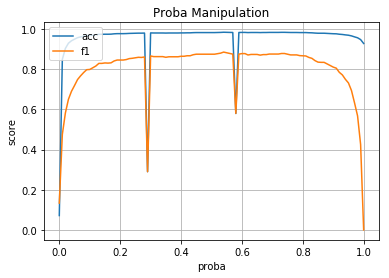

In [24]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation')
ax.legend(loc='upper left')
ax.grid()

# Grid Search

In [18]:
from sklearn.model_selection import KFold
from paramsearch import paramsearch
from itertools import product,chain

In [19]:
params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,500,1000],
          'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100],
          'border_count':[32,5,10,20,50,100,200],
          'ctr_border_count':[50,5,10,20,100,200],
          'thread_count':4}

In [20]:
# this function does 3-fold crossvalidation with catboostclassifier          
def crossvaltest(params,train_set,train_label,cat_dims,n_splits=3):
    kf = KFold(n_splits=n_splits,shuffle=True) 
    res = []
    for train_index, test_index in kf.split(train_set):
        train = train_set.iloc[train_index,:]
        test = train_set.iloc[test_index,:]

        labels = train_label.ix[train_index]
        test_labels = train_label.ix[test_index]

        clf = cb.CatBoostClassifier(**params)
        clf.fit(train, np.ravel(labels), cat_features=cat_dims)

        res.append(np.mean(clf.predict(test)==np.ravel(test_labels)))
    return np.mean(res)

In [21]:
def catboost_param_tune(params,train_set,train_label,cat_dims=None,n_splits=3):
    ps = paramsearch(params)
    # search 'border_count', 'l2_leaf_reg' etc. individually 
    #   but 'iterations','learning_rate' together
    for prms in chain(ps.grid_search(['border_count']),
                      ps.grid_search(['ctr_border_count']),
                      ps.grid_search(['l2_leaf_reg']),
                      ps.grid_search(['iterations','learning_rate']),
                      ps.grid_search(['depth'])):
        res = crossvaltest(prms,train_set,train_label,cat_dims,n_splits)
        # save the crossvalidation result so that future iterations can reuse the best parameters
        ps.register_result(res,prms)
        print(res, prms, 'best:', ps.bestscore(), ps.bestparam())
    return ps.bestparam()

bestparams = catboost_param_tune(params,x_train,y_train)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


KeyError: '[4096, 2049, 4, 4100, 4103, 8, 2057, 4106, 11, 2060, 15, 21, 4118, 4121, 28, 2076, 4124, 31, 4127, 33, 2082, 4129, 2084, 2085, 4133, 4140, 2096, 4151, 56, 57, 59, 62, 2110, 2111, 4159, 67, 4166, 72, 4169, 2122, 2123, 2124, 77, 2126, 4176, 81, 4180, 4181, 4183, 88, 2136, 4185, 93, 4190, 4192, 98, 4194, 2148, 104, 105, 4201, 108, 4207, 114, 115, 2162, 120, 2168, 2170, 2171, 4095, 4220, 4221, 4222, 4224, 4226, 131, 4228, 4229, 4232, 137, 140, 141, 2189, 2191, 2192, 2193, 4240, 147, 2196, 4244, 151, 2200, 2201, 156, 157, 2204, 4253, 160, 161, 4259, 4262, 2215, 171, 2220, 4268, 2222, 4271, 4272, 4273, 181, 4277, 4282, 4283, 188, 4286, 2239, 193, 4290, 2243, 4292, 197, 199, 200, 2248, 202, 2249, 204, 2250, 2252, 4295, 4302, 2260, 4309, 214, 2262, 2263, 2264, 2266, 219, 4310, 2276, 2278, 2282, 2283, 2284, 237, 2286, 4330, 2288, 242, 2290, 245, 2294, 2298, 251, 2300, 253, 2301, 4353, 260, 2308, 263, 264, 2313, 2315, 2318, 2328, 2330, 2331, 4378, 4379, 286, 4382, 290, 2339, 4387, 4389, 4391, 305, 4402, 309, 310, 311, 2360, 2361, 2362, 4410, 324, 4420, 2378, 4429, 339, 4436, 341, 2394, 349, 350, 4445, 4450, 356, 357, 2404, 360, 361, 362, 2410, 2411, 365, 2414, 4459, 4462, 2419, 373, 4469, 4470, 4473, 380, 2430, 383, 385, 2435, 2436, 390, 392, 394, 397, 398, 2447, 402, 2450, 405, 2453, 2454, 2455, 4502, 2458, 4507, 413, 414, 2461, 4510, 4512, 418, 423, 2472, 425, 4521, 4524, 2486, 439, 4534, 441, 4536, 2493, 452, 453, 2501, 455, 456, 2504, 2506, 4554, 2508, 2510, 463, 466, 467, 468, 469, 470, 471, 2514, 473, 2519, 4572, 2525, 4576, 481, 2529, 485, 4584, 4586, 2541, 4593, 499, 2547, 2549, 2551, 2552, 4599, 4603, 510, 2559, 4606, 2563, 517, 519, 526, 527, 4623, 530, 531, 4627, 534, 2583, 4630, 2585, 2586, 4633, 540, 542, 4639, 2592, 4645, 4646, 4647, 2600, 553, 4650, 2603, 4653, 558, 4656, 561, 566, 2615, 2618, 2619, 4666, 573, 574, 4668, 4671, 577, 579, 2627, 582, 583, 4681, 2635, 4684, 4687, 4688, 593, 594, 4691, 4696, 601, 602, 603, 2650, 4699, 606, 607, 608, 4702, 4704, 4707, 612, 2662, 4710, 622, 623, 2674, 2675, 4725, 2679, 634, 635, 2682, 640, 641, 4738, 2691, 4742, 4743, 649, 650, 4747, 654, 2703, 4756, 2709, 4761, 667, 4763, 671, 2725, 2727, 4776, 681, 2729, 2730, 2732, 4777, 4779, 2735, 4783, 2737, 690, 4786, 692, 2741, 2743, 696, 700, 2749, 702, 4802, 4803, 4804, 718, 2766, 721, 2769, 723, 724, 726, 729, 2777, 4825, 732, 2780, 2781, 4828, 2785, 739, 2788, 4836, 742, 4838, 4839, 2793, 4842, 2795, 4844, 751, 753, 4855, 2809, 4859, 2816, 4865, 2818, 2819, 4869, 775, 2825, 778, 2827, 4875, 782, 783, 785, 786, 789, 791, 792, 793, 4892, 797, 804, 4902, 807, 812, 2860, 2866, 2867, 4917, 2874, 4922, 4927, 832, 836, 2885, 2887, 2888, 2890, 843, 844, 845, 2891, 2896, 849, 4951, 856, 2904, 4952, 4954, 2908, 4957, 2910, 2912, 865, 866, 4961, 868, 870, 4966, 2920, 4970, 875, 878, 879, 2932, 2933, 2941, 4991, 4992, 2949, 4997, 2951, 908, 909, 5007, 5008, 5009, 915, 917, 918, 919, 5014, 2969, 922, 2971, 5021, 5024, 929, 2978, 5025, 932, 2981, 2982, 2983, 2984, 2985, 5031, 5032, 5035, 2989, 2991, 5043, 5044, 3003, 957, 3005, 960, 5060, 965, 3014, 3015, 5061, 5062, 5066, 5068, 5070, 3023, 978, 3029, 982, 983, 5078, 5079, 5082, 5083, 5085, 990, 991, 994, 995, 5092, 1000, 3050, 5100, 1005, 3055, 5105, 1011, 1013, 5110, 5112, 3065, 5114, 3067, 3068, 3069, 3070, 5115, 3073, 1026, 1027, 3076, 5124, 3081, 3082, 3083, 5129, 1037, 5132, 5133, 5135, 3089, 3090, 5138, 3093, 1047, 5144, 1052, 1053, 1057, 1060, 3109, 5156, 1063, 1064, 3113, 1066, 3114, 5159, 5160, 5164, 3119, 3120, 5168, 1075, 1076, 3124, 1081, 5179, 5180, 3133, 5181, 3135, 3136, 1089, 3137, 5184, 5185, 5188, 1094, 5191, 3151, 1107, 1108, 1109, 3155, 3158, 1112, 3163, 5214, 1122, 5218, 3172, 1126, 3174, 1129, 5226, 3180, 1134, 1135, 1136, 3182, 1138, 5234, 1140, 5235, 3192, 5244, 3197, 3199, 5247, 5248, 1154, 5258, 1165, 5261, 5263, 3217, 1172, 1173, 3221, 5268, 1177, 3226, 5274, 5282, 3236, 5286, 1192, 1193, 3242, 1195, 1198, 5294, 1201, 3250, 5298, 1208, 3257, 5305, 5306, 3261, 1218, 1222, 5322, 1229, 1231, 3280, 5327, 5328, 3286, 5337, 5342, 1248, 5347, 5348, 1253, 3301, 1256, 3304, 1258, 1259, 3305, 1261, 3307, 3309, 1264, 3310, 3313, 3314, 3315, 5364, 3318, 5365, 1272, 3321, 5366, 3323, 5368, 3325, 5371, 3328, 5377, 5379, 3332, 3335, 3336, 1291, 3339, 3340, 5388, 5390, 1299, 3349, 3351, 1304, 5399, 1306, 1310, 3358, 5408, 1315, 5411, 3369, 5418, 1323, 1324, 1325, 1326, 5423, 3378, 5426, 5429, 5432, 1339, 5436, 5437, 5438, 5439, 3392, 1345, 3394, 3395, 5440, 1349, 1353, 1354, 3401, 1362, 3410, 5459, 1368, 1369, 3417, 5470, 5471, 3425, 3426, 1379, 3428, 5474, 5475, 5477, 1384, 5478, 5480, 5484, 1394, 3445, 5493, 1401, 3452, 1405, 3453, 3455, 3457, 5505, 3462, 5516, 5517, 5518, 3473, 1426, 1427, 3475, 3477, 5522, 5524, 5528, 5530, 1438, 3487, 3493, 1446, 3494, 3497, 1450, 1451, 1452, 3501, 5546, 3506, 5556, 3509, 3510, 3515, 3517, 5568, 3521, 1474, 3522, 1476, 1477, 5569, 5574, 1481, 5578, 1493, 5590, 1496, 5592, 1500, 3549, 3550, 5596, 5597, 3555, 5603, 5604, 3558, 3563, 1517, 1518, 1519, 1520, 3567, 5613, 5617, 1527, 3579, 1532, 3581, 1534, 1538, 1539, 3587, 5634, 5637, 1544, 3594, 5644, 5645, 3598, 5648, 1553, 3607, 3608, 5655, 1562, 5662, 5663, 3616, 3617, 1571, 3621, 1574, 3622, 1576, 1577, 3623, 3624, 1581, 1582, 1584, 3632, 3636, 1589, 1590, 1603, 3651, 3653, 1606, 3661, 1615, 3664, 3669, 1623, 3673, 1628, 3687, 1641, 3690, 1645, 1646, 1649, 3700, 1656, 1657, 1658, 1661, 3713, 3715, 1670, 3718, 1677, 3725, 1679, 3728, 3729, 1685, 3733, 1688, 1689, 1694, 3745, 3749, 3751, 1706, 3755, 3756, 1710, 1717, 3766, 1726, 3776, 1729, 3777, 1732, 1735, 1736, 3784, 3787, 3788, 3790, 3791, 1748, 1749, 3796, 3799, 3800, 1754, 3802, 3813, 3815, 1772, 3821, 1779, 1787, 3838, 1793, 3847, 1800, 1803, 1817, 3866, 1823, 3872, 3873, 3879, 1840, 1841, 3890, 3891, 1844, 1845, 1847, 1848, 1852, 3902, 3905, 1870, 3919, 1873, 3922, 3925, 1880, 3931, 1888, 1892, 1893, 3941, 3944, 3950, 1903, 3951, 3953, 1907, 3955, 1911, 1914, 3962, 3967, 1921, 3970, 1923, 3972, 3974, 3975, 3979, 3981, 1934, 3982, 3984, 3985, 3987, 3989, 1945, 3994, 3996, 4001, 4005, 1958, 1963, 4015, 1969, 4017, 4020, 4021, 1974, 4022, 1981, 1982, 4031, 4034, 1991, 4039, 1997, 1998, 4052, 4053, 4056, 2009, 2010, 2015, 4070, 4071, 2024, 4076, 4078, 4079, 2032, 4080, 4083, 2036, 4087, 2041, 4093, 2047] not in index'